In [16]:
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

In [17]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [18]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [19]:
model.add(keras.layers.MaxPooling2D(2))

In [20]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [21]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

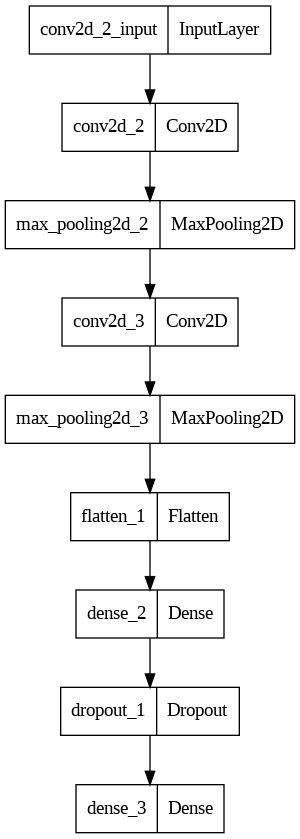

In [23]:
keras.utils.plot_model(model)

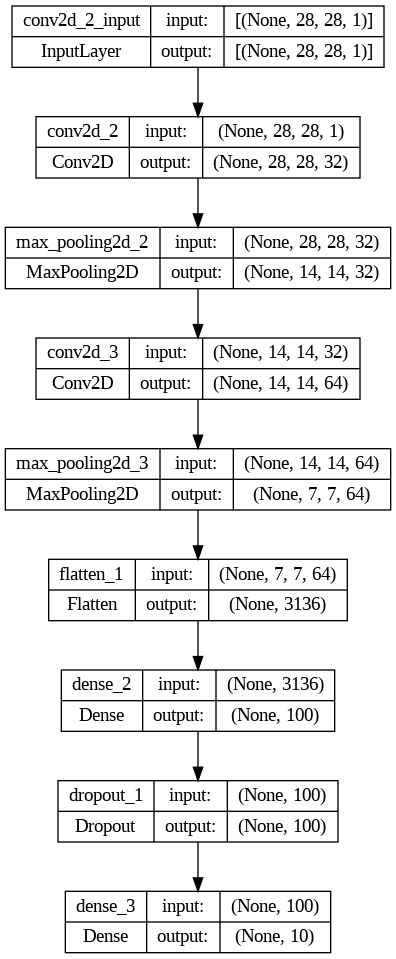

In [24]:
keras.utils.plot_model(model, show_shapes=True)

In [25]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.5048 - accuracy: 0.8201 - val_loss: 0.3141 - val_accuracy: 0.8827
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3337 - accuracy: 0.8800 - val_loss: 0.2747 - val_accuracy: 0.8970
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2878 - accuracy: 0.8969 - val_loss: 0.2429 - val_accuracy: 0.9085
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2550 - accuracy: 0.9079 - val_loss: 0.2335 - val_accuracy: 0.9119
Epoch 5/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2308 - accuracy: 0.9142 - val_loss: 0.2343 - val_accuracy: 0.9144
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2123 - accuracy: 0.9223 - val_loss: 0.2102 - val_accuracy: 0.9227
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1947 - accuracy: 0.9270 - val_loss: 0.2166 - val_accuracy

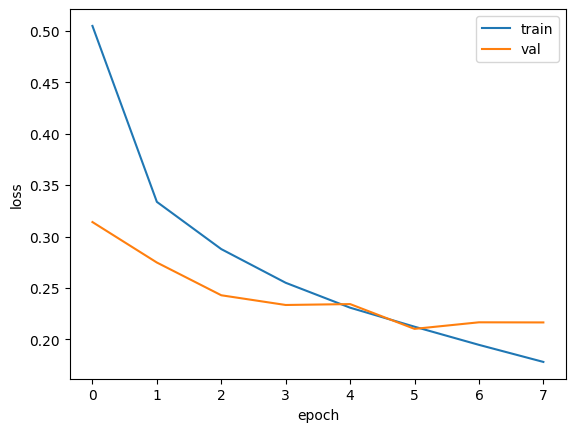

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [27]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2102 - accuracy: 0.9227


[0.2102462500333786, 0.9226666688919067]

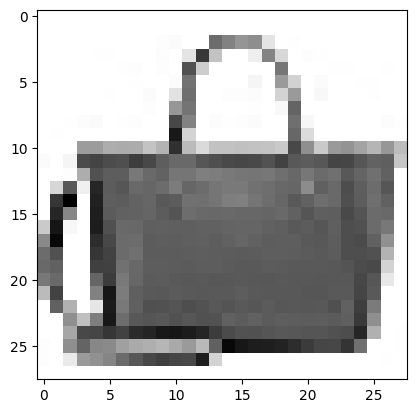

In [28]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

In [29]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 178ms/step
[[2.9109666e-15 1.2592433e-22 7.4320953e-19 2.5622614e-17 3.5019177e-16
  6.1607069e-15 5.2828132e-16 7.2069383e-15 1.0000000e+00 3.3381241e-17]]


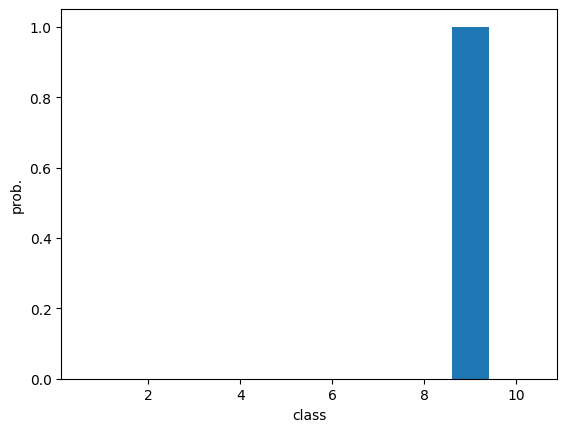

In [30]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [31]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [32]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [33]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 3ms/step - loss: 0.2337 - accuracy: 0.9171


[0.23373760282993317, 0.9171000123023987]